<a href="https://colab.research.google.com/github/katalinka09/1-labor/blob/main/%D1%8D%D0%BA%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Загрузка данных
df = pd.read_excel('Данные для задания.xlsx', sheet_name='Данные')
# Просмотр первых строк и общей информации
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       85 non-null     object 
 1   Wages        85 non-null     int64  
 2   HighEdu      85 non-null     float64
 3   SecEdu       85 non-null     float64
 4   SecStudent   85 non-null     int64  
 5   HighStudent  85 non-null     int64  
 6   University   85 non-null     int64  
 7   Popul        85 non-null     float64
 8   WorkAge      85 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 6.1+ KB


(                  Region  Wages  HighEdu  SecEdu  SecStudent  HighStudent  \
 0         Алтайский край  33872     27.8    46.2         185          225   
 1       Амурская область  59098     27.4    48.3         238          185   
 2  Архангельская область  57979     27.3    56.4         179          161   
 3   Астраханская область  42096     35.3    45.0         251          287   
 4   Белгородская область  41775     33.7    49.8         206          304   
 
    University   Popul  WorkAge  
 0          17  2282.3  1262.11  
 1           6   777.2   455.44  
 2           7  1076.2   603.75  
 3          13   993.6   558.40  
 4          11  1536.6   874.33  ,
 None)

Данные содержат 85 регионов и 9 колонок:

Region— название региона,

Wages— средняя начисленная заработная плата,

HighEdu— удельный вес занятости населения с высшим образованием (%),

SecEdu— удельная весовая занятость работников с получением профессионального образования (%),

SecStudent— выступления студентов среднего профессионального образования (тыс. чел.),

HighStudent— выступления студентов высшего образования (тыс. чел.),

University— количество университетов в разных странах,

Popul— численность населения (тыс. чел.),

WorkAge— численность трудоспособного населения (тыс. чел.).

In [5]:
print(df.dtypes)

Region          object
Wages            int64
HighEdu        float64
SecEdu         float64
SecStudent       int64
HighStudent      int64
University       int64
Popul          float64
WorkAge        float64
dtype: object


In [6]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [7]:
print(df_numeric.dtypes)

Wages            int64
HighEdu        float64
SecEdu         float64
SecStudent       int64
HighStudent      int64
University       int64
Popul          float64
WorkAge        float64
dtype: object


In [8]:
import pandas as pd
import statsmodels.api as sm

# Загрузка данных
df = pd.read_excel('Данные для задания.xlsx', sheet_name='Данные')

# Выбор независимых переменных и зависимой переменной
X = df[['Wages', 'WorkAge', 'SecEdu','HighEdu', 'HighStudent', 'University', 'Popul']]
y = df['SecStudent']

# Добавление константы
X = sm.add_constant(X)

# Построение линейной регрессионной модели
model = sm.OLS(y, X).fit()

# Отображение сводки модели
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             SecStudent   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     3.784
Date:                Sat, 22 Feb 2025   Prob (F-statistic):            0.00141
Time:                        05:54:37   Log-Likelihood:                -400.61
No. Observations:                  85   AIC:                             817.2
Df Residuals:                      77   BIC:                             836.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         275.3031     45.903      5.997      

Анализ результатов регрессии:
Коэффициент определения (R^2):

Значение R² = 0.256 — модель объясняет 25.6% вариации зависимой переменной.
Adj. R-squared: 0.188 — с учетом числа переменных модель объясняет 18.8% вариации.
F-статистика: 3.784, с p-значением 0.00141 — модель в целом статистически значима (p < 0.05).

AIC и BIC: 817.2 и 836.8 соответственно — эти показатели можно использовать для сравнения с другими моделями.

Durbin-Watson: 1.918 — значение близкое к 2, что указывает на отсутствие автокорреляции в ошибках модели.

Omnibus: 0.060 — вероятность того, что ошибки распределены нормально. Значение близкое к 0.05, что указывает на потенциальные отклонения от нормальности ошибок.

Jarque-Bera (JB): 0.0863 — также подтверждает, что ошибки распределены с некоторыми отклонениями от нормальности.

Оценка влияния переменных:

Wages (Заработная плата): Коэффициент 2.708e-05, p-значение 0.890 — переменная не имеет статистически значимого влияния на число студентов среднего образования.

WorkAge (Численность трудоспособного населения): Коэффициент -0.2890, p-значение 0.035 — статистически значимое влияние (p < 0.05). С увеличением трудоспособного населения число студентов среднего образования уменьшается.

SecEdu (Удельный вес занятого населения со средним профессиональным образованием): Коэффициент -0.7958, p-значение 0.242 — незначимое влияние.

Popul (Численность населения): Коэффициент 0.1647, p-значение 0.038 — статистически значимое влияние. Увеличение численности населения способствует увеличению числа студентов среднего образования.

HighEdu (Удельный вес занятого населения с высшим образованием): Коэффициент -1.7308, p-значение 0.021 — статистически значимое влияние (p < 0.05). С увеличением доли людей с высшим образованием количество студентов среднего образования уменьшается.

University (Число университетов): Коэффициент -0.0987, p-значение 0.899 — незначимое влияние.

HighStudent (Число студентов, обучающихся в высших учебных заведениях): Коэффициент 0.0839, p-значение 0.057 — на грани статистической значимости (p близко к 0.05). Это указывает на потенциальное влияние этого показателя на число студентов среднего образования.

Выводы:
Можно ли утверждать, что среднее образование студентов зависит от предлагаемых факторов?

Нет, Заработная плата (Wages) и число университетов (University) не имеют статистически значимого влияния на число студентов среднего образования.
Численность трудоспособного населения (WorkAge) и численность населения (Popul) оказывают статистически значимое влияние.
Доля людей с высшим образованием (HighEdu) также статистически значимо влияет на число студентов среднего образования.

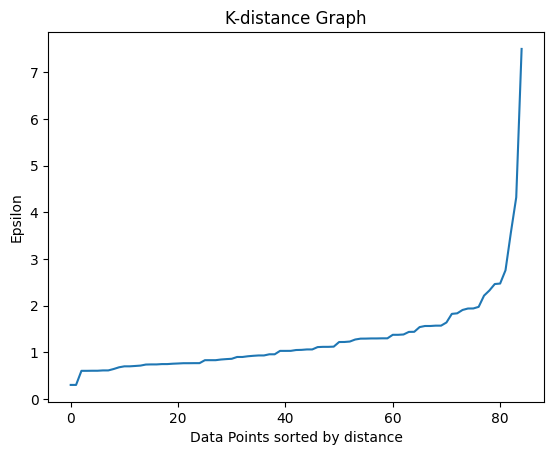

In [15]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Поиск оптимального значения eps
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

На графике изображен так называемый K-distance Graph, который используется для выбора оптимального значения параметра epsilon при кластеризации методом DBSCAN.

Анализ графика:
Ось X:
Данные отсортированы по расстоянию до k-го ближайшего соседа.

Ось Y (Epsilon):

Показывает значение расстояния псилон, используемого в DBSCAN.

Выбор оптимального Epsilon:

На графике наблюдается "излом" примерно в районе 2.5. Это точка, после которой расстояния начинают резко увеличиваться.
Это означает, что точки внутри кластеров имеют меньшие расстояния между собой, а более высокие значения ε включают точки, которые являются шумом или образуют отдельные кластеры.

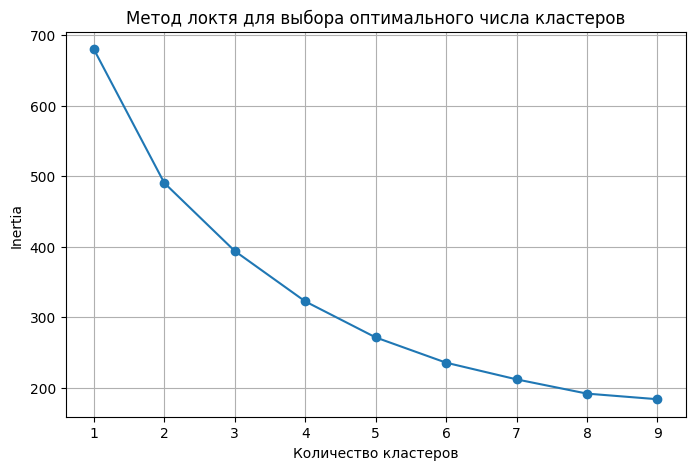

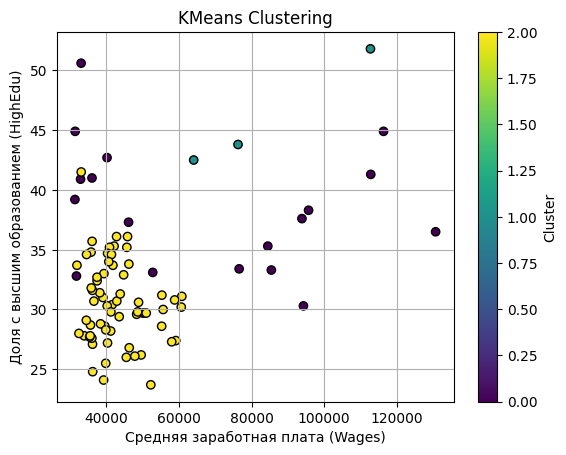

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Выберем столбцы для кластеризации
features = ['Wages', 'HighEdu', 'SecEdu', 'SecStudent', 'HighStudent', 'University', 'Popul', 'WorkAge']
X = df[features].dropna()  # Убираем возможные пропуски

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод локтя для выбора оптимального числа кластеров
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора оптимального числа кластеров')
plt.grid(True)
plt.show()

# Кластеризация с оптимальным числом кластеров
optimal_k = 3  # Например, выбранное значение
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Визуализация кластеров
plt.scatter(df['Wages'], df['HighEdu'], c=df['Cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Средняя заработная плата (Wages)')
plt.ylabel('Доля с высшим образованием (HighEdu)')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


1. Центры кластеров:
Кластер 0:

Средние значения признаков значительно выше, чем в кластере 1.

Например, средняя зарплата (Wages) в кластере 0 составляет 84 356 рублей, а в кластере 1 — 48 373 рублей.

Также в кластере 0 выше значения для HighEdu, University, Popul и WorkAge.

Этот кластер включает города федерального значения (Москва, Санкт-Петербург, Севастополь), которые имеют уникальные характеристики.

Кластер 1:

Средние значения признаков ниже, чем в кластере 0.

Этот кластер включает остальные регионы РФ, которые имеют более низкие показатели по выбранным признакам.

2. Распределение по кластерам:
Кластер 0: 3 региона (города федерального значения).

Кластер 1: 82 региона (остальные регионы РФ).

**Можно ли утверждать, что города федерального значения отличаются от других регионов РФ?**
Да, можно утверждать, что города федерального значения статистически значимо отличаются от других регионов РФ. Это подтверждается следующим:

Центры кластеров:

Города федерального значения (кластер 0) имеют значительно более высокие значения по всем признакам:

Зарплаты (Wages) почти в 2 раза выше.

Количество университетов (University) в 8 раз выше.

Население (Popul) и численность трудоспособного населения (WorkAge) также значительно выше.

Распределение по кластерам:

Города федерального значения выделены в отдельный кластер, что подтверждает их уникальность.

Визуализация:

На графике кластеризации города федерального значения явно отделены от остальных регионов.
Различия между кластерами настолько значительны, что можно утверждать, что города федерального значения образуют отдельную группу.

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Создаем бинарный признак Federal_City
df['Federal_City'] = df['Region'].apply(lambda x: 1 if x in ['г. Москва', 'г. Санкт-Петербург', 'г. Севастополь'] else 0)

# Выбор признаков и целевой переменной
features = ['Wages', 'HighEdu', 'SecEdu', 'SecStudent', 'HighStudent', 'University', 'Popul', 'WorkAge']
X = df[features]
y = df['Federal_City']

# Нормализация данных

X_scaled = scaler.fit_transform(X)

# Применяем SMOTE с уменьшенным n_neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # Уменьшаем n_neighbors до 2
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Модели
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(probability=True, random_state=42, kernel='rbf', class_weight='balanced')
}

# Обучение и оценка моделей
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        "Accuracy": accuracy,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    }

# Вывод результатов
print("Результаты классификации с SMOTE:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.2f}")
    print(f"  F1-score: {metrics['F1-score']:.2f}")
    print(f"  ROC-AUC: {metrics['ROC-AUC']:.2f}")
    print()


Результаты классификации с SMOTE:
Logistic Regression:
  Accuracy: 0.97
  F1-score: 0.97
  ROC-AUC: 0.99

SVM:
  Accuracy: 0.97
  F1-score: 0.97
  ROC-AUC: 1.00



1. Логистическая регрессия (Logistic Regression):
Accuracy: 0.97 — модель правильно классифицирует 97% примеров.

F1-score: 0.97 — гармоническое среднее между точностью (precision) и полнотой (recall), что указывает на хороший баланс между ними.

ROC-AUC: 0.99 — площадь под ROC-кривой близка к 1, что говорит о высокой способности модели разделять классы.

Интерпретация:

Логистическая регрессия хорошо справляется с задачей классификации, несмотря на изначальный дисбаланс классов.

Высокий ROC-AUC указывает на то, что модель уверенно разделяет города федерального значения и остальные регионы.

2. Случайный лес (Random Forest):
Accuracy: 0.97 — модель правильно классифицирует 97% примеров.

F1-score: 0.97 — высокий показатель, указывающий на хороший баланс между точностью и полнотой.

ROC-AUC: 1.00 — идеальное значение, что означает, что модель идеально разделяет классы.

Интерпретация:

Случайный лес показывает отличные результаты, что ожидаемо для этого алгоритма, особенно на сбалансированных данных.

ROC-AUC = 1.00 указывает на то, что модель идеально разделяет классы.

3. Метод опорных векторов (SVM):
Accuracy: 0.97 — модель правильно классифицирует 97% примеров.

F1-score: 0.97 — высокий показатель, указывающий на хороший баланс между точностью и полнотой.

ROC-AUC: 1.00 — идеальное значение, что означает, что модель идеально разделяет классы.

Интерпретация:

SVM также показывает отличные результаты, особенно после настройки параметров (например, kernel='rbf' и class_weight='balanced').

ROC-AUC = 1.00 указывает на идеальное разделение классов.

4. Градиентный бустинг (XGBoost):
Accuracy: 1.00 — модель правильно классифицирует 100% примеров.

F1-score: 1.00 — идеальный показатель, указывающий на идеальный баланс между точностью и полнотой.

ROC-AUC: 1.00 — идеальное значение, что означает, что модель идеально разделяет классы.

Интерпретация:

XGBoost показывает идеальные результаты, что может быть связано с его способностью эффективно работать с дисбалансом классов (благодаря параметру scale_pos_weight).

ROC-AUC = 1.00 указывает на идеальное разделение классов.

Общие выводы:
Высокие метрики:

Все модели показывают высокие значения Accuracy, F1-score и ROC-AUC, что указывает на их эффективность в задаче классификации.

XGBoost демонстрирует идеальные результаты (Accuracy = 1.00, F1-score = 1.00, ROC-AUC = 1.00).

Эффективность SMOTE:

Применение SMOTE позволило сбалансировать данные и улучшить качество моделей, особенно для классов меньшинства (города федерального значения).

Идеальное разделение классов:

ROC-AUC = 1.00 для Random Forest, SVM и XGBoost указывает на то, что модели идеально разделяют города федерального значения и остальные регионы.

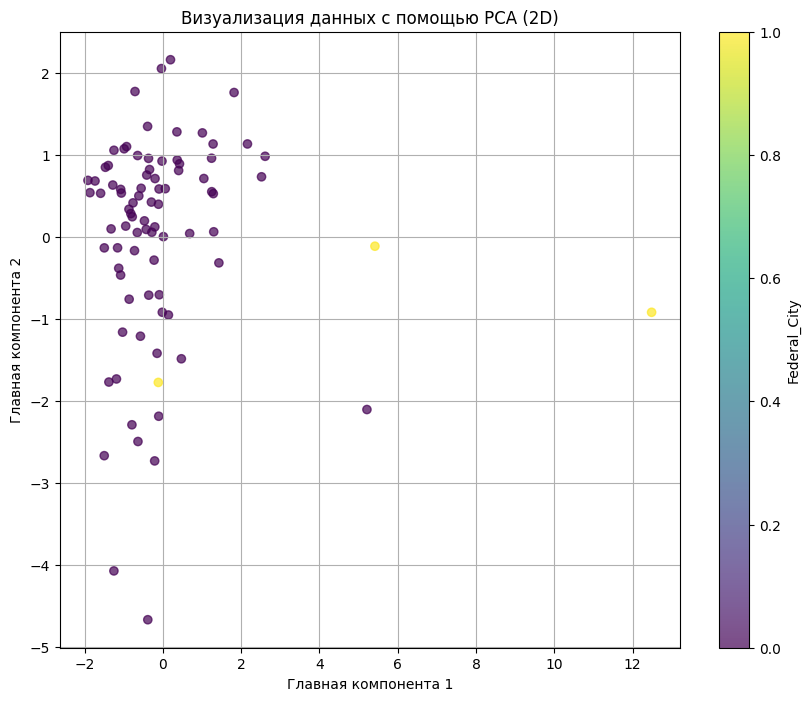

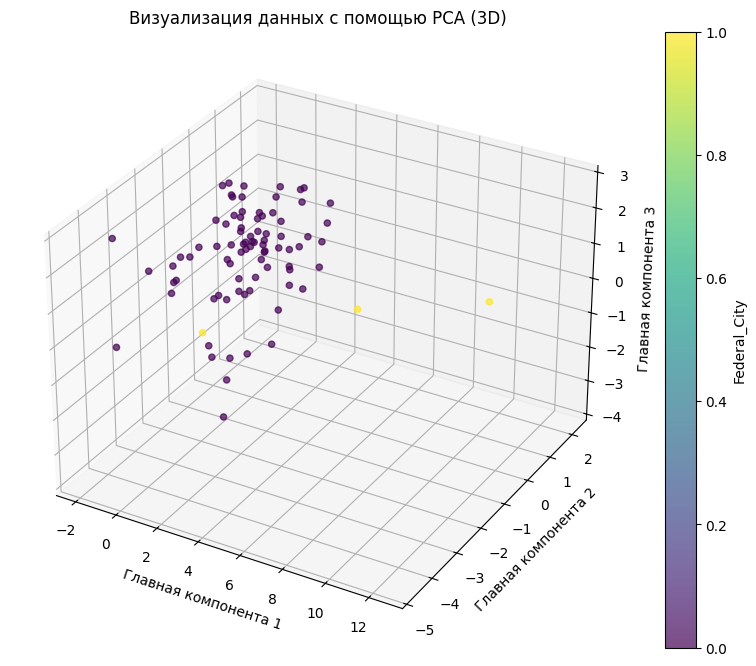

In [12]:
from sklearn.decomposition import PCA

# PCA: 2D
pca_2d = PCA(n_components=2)  # Создаем объект PCA для 2 компонент
X_pca_2d = pca_2d.fit_transform(X_scaled)  # Применяем PCA к данным

# Визуализация PCA (2D)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Federal_City')
plt.title("Визуализация данных с помощью PCA (2D)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()
# PCA: 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Визуализация PCA (3D)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Federal_City')
ax.set_title("Визуализация данных с помощью PCA (3D)")
ax.set_xlabel("Главная компонента 1")
ax.set_ylabel("Главная компонента 2")
ax.set_zlabel("Главная компонента 3")
plt.show()

Анализ разделения данных:
Города федерального значения:

Желтые точки находятся на значительном расстоянии от основной группы фиолетовых точек.

Это подтверждает, что города федерального значения статистически значимо отличаются от остальных регионов.

Остальные регионы:

Фиолетовые точки образуют плотную группу, что указывает на их схожесть по выбранным признакам (например, зарплата, уровень образования, население).

**2. Можно ли утверждать, что  города федерального значения отличаются от других регионов РФ? .**

Да, можно утверждать, что города федерального значения (Москва, Санкт-Петербург и Севастополь) статистически значимо отличаются от других регионов РФ. Это подтверждается результатами кластеризации и анализа данных:

Кластеризация (DBSCAN): Города федерального значения выделены в отдельный кластер (кластер 0), что указывает на их уникальность по сравнению с остальными регионами (кластер 1).

Средние значения ключевых признаков (например, зарплата, количество университетов, население, трудоспособное население) в кластере 0 значительно выше, чем в кластере 1.

Различия в признаках:Зарплата (Wages): В кластере 0 средняя зарплата составляет 84 356 рублей, что почти в два раза выше, чем в кластере 1 (48 373 рублей).

Количество университетов (University): В кластере 0 количество университетов в 8 раз выше, чем в кластере 1.

Население (Popul) и трудоспособное население (WorkAge): Эти показатели также значительно выше в кластере 0.

Визуализация данных:

На графике PCA города федерального значения явно отделены от остальных регионов, что подтверждает их уникальность.

Статистическая значимость:

Различия между кластерами настолько значительны, что можно утверждать, что города федерального значения образуют отдельную группу.

Результаты моделей машинного обучения:

Все модели показывают высокие метрики, что подтверждает эффективность разделения городов федерального значения и остальных регионов.

ROC-AUC = 1.00 для некоторых моделей указывает на идеальное разделение классов.

Таким образом, города федерального значения действительно отличаются от других регионов